IAU Projekt 1.fáza - Prieskumná analýza 

Autori: Lukáš Lovás(50%), Daniel Lendvorský(50%)

Dátum: 20.10.2023

In [558]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

Načítanie údajov z datasetov

In [559]:
filename = "084/product.csv"
product = pd.read_csv(filename, sep='\t')
product.head()

,code,store_name,product_ean,location
0,GB,Newbury,6528474892715,Europe/London
1,JP,Fujioka,5286283223229,Asia/Tokyo
2,AU,Carindale,5324066396422,Australia/Brisbane
3,JP,Yao,4730125966337,Asia/Tokyo
4,PK,Naushahra Virkan,9619713549372,Asia/Karachi


In [560]:
filename2 = "084/session.csv"
session = pd.read_csv(filename2, sep='\t')
session.head()

,user_id,pct_rage_click,page_activity_duration,pct_wild_mouse,product_ean,pct_click_product_info,pct_input,pct_scrandom,total_load_time,pct_click,...,mouse_move_total_rel_distance,session_start,screen_height,pct_mouse_move,browser_name,pct_scroll_move,session_id,scroll_move_total_rel_distance,session_duration,wild_mouse_duration
0,1267,13.36096,11.11023,57.22747,5118402349247,61.27995,1.69380,34.23153,9.49291,11.96745,...,9.99263,2021-08-31 01:16:45,600,9.55140,edge,77.30550,1011277,8.30487,145.66025,8.27685
1,1831,39.43056,11.38646,48.81767,6613735863389,55.97373,1.93407,58.66919,1.26378,10.36340,...,10.30287,2021-05-28 17:34:01,768,8.07874,chrome,61.26521,539491,7.70199,109.48956,8.38637
2,374,62.84361,11.17206,53.92373,7388729766852,57.18573,1.59960,47.47953,3.28962,5.02218,...,7.49351,2018-12-28 16:43:17,1024,6.88911,chrome,48.98359,394667,8.17021,204.12507,8.36077
3,2260,64.68865,6.33869,37.68672,1190955887968,54.34917,0.44924,39.85515,2.25213,11.32430,...,8.26995,2022-02-03 06:22:50,800,7.53323,edge,66.82098,748123,7.97703,123.40293,4.17809
4,779,63.11689,4.82687,54.53248,9538008640320,27.01917,1.21089,15.93508,4.11748,10.18901,...,12.31943,2021-03-10 00:03:46,768,9.00901,mobile,75.85706,758679,9.01442,179.22699,8.08819


In [561]:
filename3 = "084/user.csv"
user = pd.read_csv(filename3, sep='\t')
user.head()

,address,birthdate,sex,registration,name,username,mail,user_id,job,residence,race
0,Čajkovského 3\n203 70 Karolinka,2010-01-17,M,2015-03-12,Bohuslav Novotný,lucienemcova,vojtech17@chello.cz,172,NaN,Závrchy 7\n220 65 Luhačovice,unspecified
1,"PSC 7369, Box 4045\nAPO AA 65240",1909-01-15,NaN,2019-07-12,Richard Walker,williamspeter,megan55@yahoo.com,2091,NaN,NaN,unspecified
2,"Piazza Grisoni, 52 Piano 9\n09020, Villanovafr...",1970-07-04,M,2016-06-30,Dario Buscetta,jmajewski,gioeleturati@outlook.com,146,NaN,NaN,NaN
3,"Rua Vitor Gabriel Gonçalves, 8\nVila Independe...",1915-10-01,NaN,2013/09/29,Bianca Cardoso,melissa88,nrodrigues@ig.com.br,659,Educador,NaN,asian
4,Pod Čertovou Skalou 4\n455 19 Nalžovské Hory,NaN,NaN,16 Aug 2017,Tomáš Blažek,frantisekprochazka,kadlecovasara@chello.cz,1196,NaN,NaN,NaN


Základný opis dát spolu s ich charakteristikami

DATASET:product 

EDA s vizualizáciou

Dataset product.csv obsahuje dokopy 14915 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 4. 

Zoznam jednotlivých atribútov:

	product_ean
	store_name
	code
	location

In [562]:
product.shape

(14915, 4)

In [563]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14895 non-null  object
 1   store_name   14915 non-null  object
 2   product_ean  14915 non-null  int64 
 3   location     14915 non-null  object
dtypes: int64(1), object(3)
memory usage: 466.2+ KB


In [564]:
product.describe()

,product_ean
count,1.491500e+04
mean,5.005494e+12
std,2.883216e+12
min,8.830915e+08
25%,2.505067e+12
50%,5.006744e+12
75%,7.507479e+12
max,9.999557e+12


Analýza jednotlivých atribútov v datasete

Atribúty z datasetu product.csv, ktoré nás budú zaujímať sú najmä product_ean a location. Pri
skúmaní môžeme napríklad zisťovať, či existuje nejaká závislosť medzi lokáciou a závislou hodnotou premennej “ack” (predikovaná premenna) indikujúcu nákup zákazníka počas jedného sedenia (session) v e-obchode. Atribút product_ean budeme potrebovať pre vyhľadávanie hodnôt v druhom
datasete session.csv, keďže tento atribút sa nachádza v oboch datasetoch.

In [565]:
product.code.value_counts()

code
US    2504
IN    1078
RU     820
DE     760
BR     667
      ... 
MN      10
SA       9
TJ       9
ML       8
LR       6
Name: count, Length: 133, dtype: int64

In [566]:
product.location.value_counts()

location
Asia/Kolkata        1078
America/New_York    1070
Europe/Berlin        760
America/Chicago      689
Europe/London        620
                    ... 
Asia/Yakutsk           9
Asia/Dushanbe          9
Asia/Riyadh            9
Africa/Bamako          8
Africa/Monrovia        6
Name: count, Length: 184, dtype: int64

In [567]:
product.store_name.value_counts()

store_name
New City             30
Inverness            28
Kobuleti             27
Gilbert              27
Beidao               26
                     ..
Sheoganj              6
Curitiba              6
Granger               6
Gates-North Gates     5
Custoias              5
Name: count, Length: 958, dtype: int64

In [568]:
product.product_ean.value_counts()

product_ean
6528474892715    1
4140694863515    1
699830198157     1
3038483943962    1
3903022305467    1
                ..
8662802065650    1
1350851393455    1
1863129911850    1
189871915665     1
9345956116292    1
Name: count, Length: 14915, dtype: int64

Identifikácia problémov v dátach s prvotným riešením

Overenie duplicitných záznamov

Ako môžeme vidieť v datasete product sme nenašli žiadne duplicikáty a momentálne sme neidentifikovali žiadne iné problémy v daných dátach s prvotným riešením.

In [569]:
duplicate = product[product.duplicated()]
product = product.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(product)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 14915
V datasete sa nachádza: 0 duplikátov.


DATASET: session

Dataset session.csv obsahuje dokopy 11046 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 25. 

In [570]:
session.shape

(11046, 25)

In [571]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         11046 non-null  int64  
 1   pct_rage_click                  11035 non-null  float64
 2   page_activity_duration          11035 non-null  float64
 3   pct_wild_mouse                  11035 non-null  float64
 4   product_ean                     11046 non-null  int64  
 5   pct_click_product_info          11035 non-null  float64
 6   pct_input                       11035 non-null  float64
 7   pct_scrandom                    11035 non-null  float64
 8   total_load_time                 11046 non-null  float64
 9   pct_click                       11035 non-null  float64
 10  screen_width                    11046 non-null  object 
 11  pct_scroll_move_duration        11035 non-null  float64
 12  ack                             

In [572]:
session.describe()

,user_id,pct_rage_click,page_activity_duration,pct_wild_mouse,product_ean,pct_click_product_info,pct_input,pct_scrandom,total_load_time,pct_click,...,ack,pct_mouse_click,pct_doubleclick,mouse_move_total_rel_distance,pct_mouse_move,pct_scroll_move,session_id,scroll_move_total_rel_distance,session_duration,wild_mouse_duration
count,11046.000000,11035.000000,11035.000000,11035.000000,1.104600e+04,11035.000000,11035.000000,11035.000000,11046.000000,11035.000000,...,11046.000000,11035.000000,11035.000000,11035.000000,11035.000000,11035.000000,1.104600e+04,11034.000000,11046.000000,11035.000000
mean,1255.780645,49.335913,8.690997,48.587438,5.028290e+12,49.111376,1.178877,50.285934,4.005360,9.289874,...,0.548162,9.682500,9.456206,9.292634,8.508854,52.182707,7.518338e+05,8.519333,150.604875,6.792734
std,718.615742,13.942751,2.233684,13.214715,2.890200e+12,13.296536,2.160966,12.439419,2.805904,2.028780,...,0.497698,2.473803,2.002375,2.118023,0.998451,13.502190,4.315524e+05,1.007736,60.977556,1.410734
min,0.000000,0.000000,0.737390,0.000000,2.412431e+09,0.000000,0.000000,0.000000,0.013140,1.090310,...,0.000000,0.000000,1.699640,0.342750,4.891520,0.000000,1.030000e+03,4.470330,-92.919090,0.602960
25%,636.000000,39.724560,6.988780,39.763010,2.556155e+12,40.187780,0.609060,41.917425,1.938618,8.281450,...,0.000000,8.010070,8.297860,8.042850,7.839245,43.071045,3.783465e+05,7.839832,109.499407,5.932995
50%,1250.500000,49.316090,8.828940,48.687750,5.008988e+12,49.064000,0.773720,50.249340,3.374895,9.758960,...,1.000000,9.677540,9.730900,9.702120,8.500650,52.143120,7.537820e+05,8.518630,150.397070,6.805400
75%,1884.000000,58.940205,10.420815,57.461865,7.556391e+12,58.072415,1.073915,58.698980,5.401983,10.666375,...,1.000000,11.320900,10.820610,10.715855,9.191965,61.328060,1.122913e+06,9.202202,191.316595,7.638670
max,2499.000000,100.000000,15.557980,100.000000,9.998981e+12,100.000000,100.000000,100.000000,23.115910,14.642410,...,1.000000,21.039530,16.734470,16.348300,11.981490,100.000000,1.499885e+06,12.324070,391.029670,12.862990


Analýza významných atribútov v datasete

Atribúty z datasetu labor.csv, sú najmä číselné atribúty a preto viacero z nich je zaujímavých. Je možné
pozorovať rôzne závislosti a vzťahy medzi nimi. Nás budú zaujímať hlavne tieto atribúty:

ack                               
page_activity_duration                          
browser_name                       
product_ean                                  
user_id                         
session_start                        
session_duration                                  

Atribúty product_ean a user_id budeme potrebovať pre spojenie s druhými datasetmi product.csv a user.csv, keďže tieto atribúty sú v daných súboroch spoločné.


     

Atribút: ack

In [573]:
session.ack.value_counts()

ack
1.0    6055
0.0    4991
Name: count, dtype: int64

<Axes: xlabel='ack'>

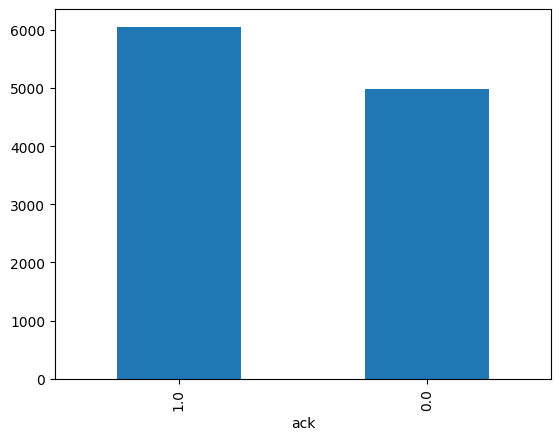

In [574]:
session.ack.value_counts().plot(kind='bar')

Atribút: page_activity_duration

In [575]:
session.page_activity_duration.describe()

count    11035.000000
mean         8.690997
std          2.233684
min          0.737390
25%          6.988780
50%          8.828940
75%         10.420815
max         15.557980
Name: page_activity_duration, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='page_activity_duration', ylabel='Count'>

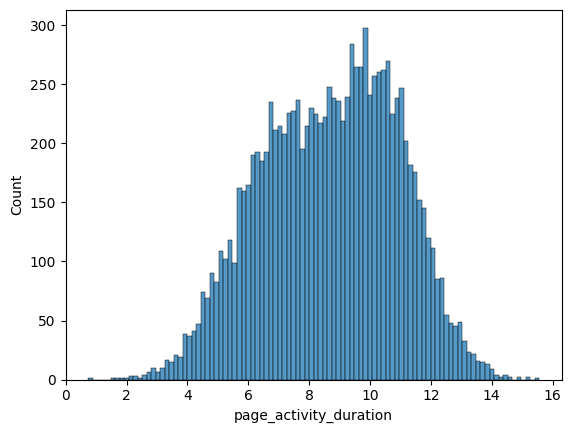

In [576]:
sns.histplot(session.page_activity_duration,bins=100)

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='page_activity_duration'>

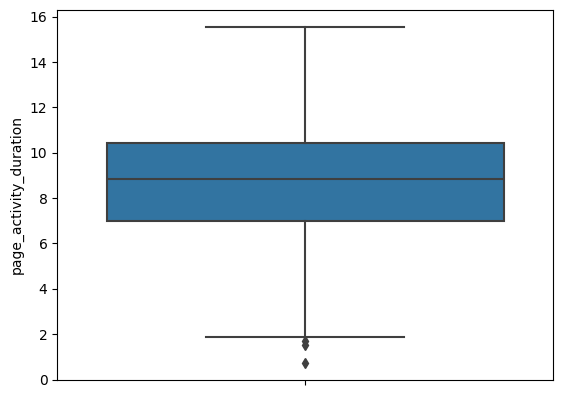

In [577]:
sns.boxplot(y = session.page_activity_duration)

Atribút: browser_name

In [578]:
session.browser_name.describe()

count      11046
unique         7
top       chrome
freq        3336
Name: browser_name, dtype: object

In [579]:
session['browser_name'].value_counts()


browser_name
chrome     3336
edge       3270
safari     1152
firefox    1086
mobile     1045
other       603
opera       554
Name: count, dtype: int64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='browser_name', ylabel='count'>

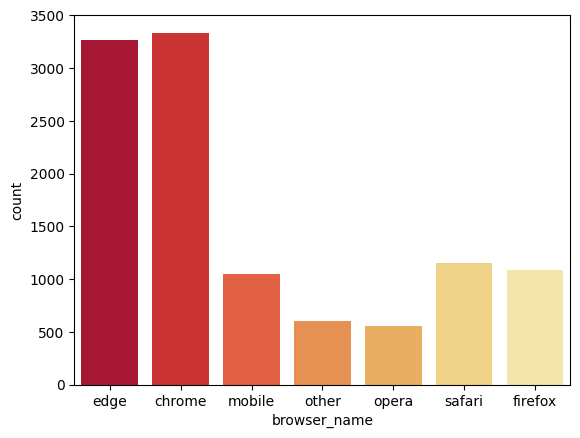

In [580]:
sns.countplot(data=session,x="browser_name",palette=("YlOrRd_r"))

Atribút: user_id

In [581]:
session.user_id.describe()

count    11046.000000
mean      1255.780645
std        718.615742
min          0.000000
25%        636.000000
50%       1250.500000
75%       1884.000000
max       2499.000000
Name: user_id, dtype: float64

Atribút: session_start

In [582]:
session.session_start.describe()


count                   11046
unique                  10915
top       2022-09-25 00:25:43
freq                        2
Name: session_start, dtype: object

Atribút: session_duration

In [583]:
session.session_duration.describe()


count    11046.000000
mean       150.604875
std         60.977556
min        -92.919090
25%        109.499407
50%        150.397070
75%        191.316595
max        391.029670
Name: session_duration, dtype: float64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='session_duration', ylabel='Count'>

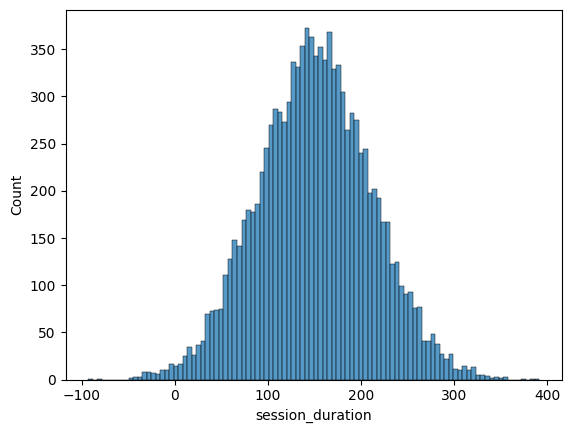

In [584]:
sns.histplot(session.session_duration,bins=100)

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='session_duration'>

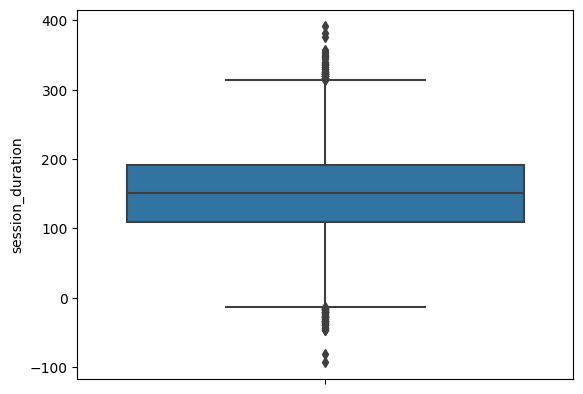

In [585]:
sns.boxplot(y = session.session_duration)

Identifikácia problémov v dátach s prvotným riešením

Overenie duplicitných záznamov

In [586]:
duplicate = session[session.duplicated()]
session = session.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(session)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 10915
V datasete sa nachádza: 131 duplikátov.


Analýza dát datasetu a nájdenie riešení pre optimalizáciu

In [587]:
print([key for key, value in session.dtypes.items() if value == 'object'])

['screen_width', 'session_start', 'screen_height', 'browser_name']


In [588]:
session.screen_height.unique()
session.screen_width.unique()

array(['800', '1280', '1366', '1024', '1920', 'lower', 'higher'],
      dtype=object)

podľa analýzy typov atribútov datasetu je možné vidieť nasledovné zlepšenia :
- screen_width, screen_height sú typu object (String), ideálne by bolo držať si ich vo formáte int
- session_start značí informáciu o začiatku komunikácie, je vhodné ho vložiť namiesto poradia ako index Datasetu.
- nahradiť  

In [589]:
valid_heights = session[~session.screen_height.isin(["lower", "higher"])]
valid_heights['screen_height'] = valid_heights['screen_height'].astype(float)

valid_width = session[~session.screen_width.isin(["lower", "higher"])]
valid_width['screen_width'] = valid_width['screen_width'].astype(float)

min_height = valid_heights['screen_height'].min()
max_height = valid_heights['screen_height'].max()

min_width = valid_width['screen_width'].min()
max_width = valid_width['screen_width'].max()

def replace_values_height(value):
    if value == 'lower':
        return min_height
    elif value == 'higher':
        return max_height
    else:
        return value

def replace_values_width(value):
    if value == 'lower':
        return min_width
    elif value == 'higher':
        return max_width
    else:
        return value

session['screen_height'] = session['screen_height'].apply(replace_values_height)
session['screen_height'] = session['screen_height'].fillna(0).astype(int)

session['screen_width'] = session['screen_width'].apply(replace_values_width)
session['screen_width'] = session['screen_width'].fillna(0).astype(int)


C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_2804\2537453075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_heights['screen_height'] = valid_heights['screen_height'].astype(float)
C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_2804\2537453075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_width['screen_width'] = valid_width['screen_width'].astype(float)


In [590]:
session.screen_height.unique()
session.screen_width.unique()

array([ 800, 1280, 1366, 1024, 1920])

-dočasné odstránenie 'session_start' a 'browser_name' atribútov z datasetu, zdôvodu zfunkčnenia heatmapy na zistenie korelácií

In [606]:
session.drop('session_start', axis=1, inplace=True)
session.drop('browser_name', axis=1, inplace=True)


DATASET:user

Dataset user.csv obsahuje dokopy 2585 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 11. 


In [592]:
user.shape

(2585, 11)

In [593]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       2197 non-null   object
 1   birthdate     1422 non-null   object
 2   sex           1293 non-null   object
 3   registration  2585 non-null   object
 4   name          2585 non-null   object
 5   username      2585 non-null   object
 6   mail          2585 non-null   object
 7   user_id       2585 non-null   int64 
 8   job           1034 non-null   object
 9   residence     905 non-null    object
 10  race          776 non-null    object
dtypes: int64(1), object(10)
memory usage: 222.3+ KB


In [594]:
user.describe()

,user_id
count,2585.000000
mean,1279.099420
std,733.313018
min,0.000000
25%,652.000000
50%,1283.000000
75%,1903.000000
max,2584.000000


Analýza významných atribútov v datasete

Atribúty z datasetu user.csv, ktoré nás budú zaujímať sú najmä birthdate, registration, user_id, sex a race.

Pri skúmaní môžeme napríklad zisťovať, či existuje nejaká závislosť medzi danými atribútmi a predikovanou premennou ack. 

Atribút user_id ako už bolo spomenuté budeme potrebovať pre vyhľadávanie hodnôt v druhom
datasete session.csv.

In [595]:
user.sex.value_counts()

sex
M    652
F    641
Name: count, dtype: int64

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='count'>

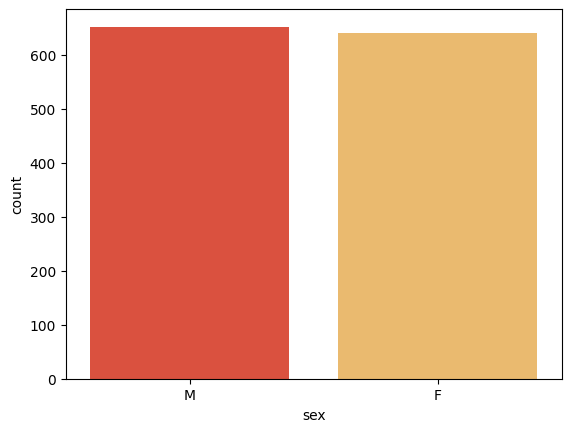

In [596]:
sns.countplot(data=user,x="sex",palette=("YlOrRd_r"))

In [597]:
user.race.value_counts()

race
unspecified    238
white          167
black          164
asian          144
indian          63
Name: count, dtype: int64

<Axes: ylabel='count'>

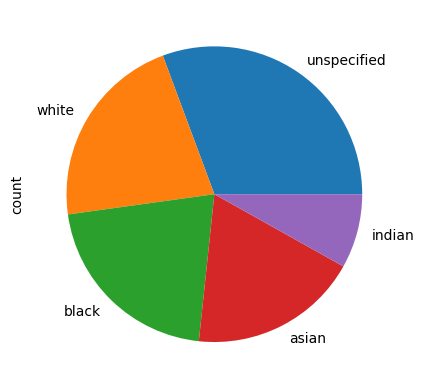

In [598]:
user.race.value_counts().plot(kind='pie')

In [599]:
user.birthdate.value_counts()

birthdate
1960-03-04    3
1928-10-27    2
1969-05-13    2
1977-12-04    2
1948-03-02    2
             ..
1912-03-27    1
2006-02-15    1
1936-06-06    1
1944-09-24    1
1929-12-10    1
Name: count, Length: 1395, dtype: int64

In [600]:
user.registration.value_counts()

registration
06 Nov 2014    4
2021-03-29     4
2020-09-15     3
20 Nov 2019    3
2014/12/29     3
              ..
2013-10-31     1
09 Apr 2022    1
2022/04/03     1
2023/02/10     1
2018-08-14     1
Name: count, Length: 2356, dtype: int64

Identifikácia problémov v dátach s prvotným riešením

Overenie duplicitných záznamov

In [601]:
duplicate = user[user.duplicated()]
user = user.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(user)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 2585
V datasete sa nachádza: 0 duplikátov.


Overenie prázdnych hodnôt

In [602]:
session.isnull().sum()

user_id                            0
pct_rage_click                    11
page_activity_duration            11
pct_wild_mouse                    11
product_ean                        0
pct_click_product_info            11
pct_input                         11
pct_scrandom                      11
total_load_time                    0
pct_click                         11
screen_width                       0
pct_scroll_move_duration          11
ack                                0
pct_mouse_click                   11
pct_doubleclick                   11
mouse_move_total_rel_distance     11
session_start                      0
screen_height                      0
pct_mouse_move                    11
browser_name                       0
pct_scroll_move                   11
session_id                         0
scroll_move_total_rel_distance    11
session_duration                   0
wild_mouse_duration               11
dtype: int64

Ako máme možnosť vidieť v niektorých stĺpcoch chýbajú viaceré hodnoty. Preto sme sa rozhodli tieto číselné
atribúty nahradiť priemerom, keďže nechceme prísť o ďalšie dáta.


In [603]:
pct_rage_clickMean = session['pct_rage_click'].mean()
session['pct_rage_click'] = session['pct_rage_click'].fillna(pct_rage_clickMean)
page_activity_durationMean = session['page_activity_duration'].mean()
session['page_activity_duration'] = session['page_activity_duration'].fillna(page_activity_durationMean)
pct_wild_mouseMean = session['pct_wild_mouse'].mean()
session['pct_wild_mouse'] = session['pct_wild_mouse'].fillna(pct_wild_mouseMean)
pct_click_product_infoMean = session['pct_click_product_info'].mean()
session['pct_click_product_info'] = session['pct_click_product_info'].fillna(pct_click_product_infoMean)
pct_inputMean = session['pct_input'].mean()
session['pct_input'] = session['pct_input'].fillna(pct_inputMean)
pct_scrandomMean = session['pct_scrandom'].mean()
session['pct_scrandom'] = session['pct_scrandom'].fillna(pct_scrandomMean)
pct_clickMean = session['pct_click'].mean()
session['pct_click'] = session['pct_click'].fillna(pct_clickMean)
pct_scroll_move_durationMean = session['pct_scroll_move_duration'].mean()
session['pct_scroll_move_duration'] = session['pct_scroll_move_duration'].fillna(pct_scroll_move_durationMean)
pct_mouse_clickMean = session['pct_mouse_click'].mean()
session['pct_mouse_click'] = session['pct_mouse_click'].fillna(pct_mouse_clickMean)
pct_doubleclickMean = session['pct_doubleclick'].mean()
session['pct_doubleclick'] = session['pct_doubleclick'].fillna(pct_doubleclickMean)
mouse_move_total_rel_distanceMean = session['mouse_move_total_rel_distance'].mean()
session['mouse_move_total_rel_distance'] = session['mouse_move_total_rel_distance'].fillna(mouse_move_total_rel_distanceMean)
pct_mouse_moveMean = session['pct_mouse_move'].mean()
session['pct_mouse_move'] = session['pct_mouse_move'].fillna(pct_mouse_moveMean)
pct_scroll_moveMean = session['pct_scroll_move'].mean()
session['pct_scroll_move'] = session['pct_scroll_move'].fillna(pct_scroll_moveMean)
scroll_move_total_rel_distanceMean = session['scroll_move_total_rel_distance'].mean()
session['scroll_move_total_rel_distance'] = session['scroll_move_total_rel_distance'].fillna(scroll_move_total_rel_distanceMean)
wild_mouse_durationMean = session['wild_mouse_duration'].mean()
session['wild_mouse_duration'] = session['wild_mouse_duration'].fillna(wild_mouse_durationMean)

In [604]:
session.isnull().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
session_start                     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
dtype: int64

Párová analýza dát


Heatmap

<Axes: >

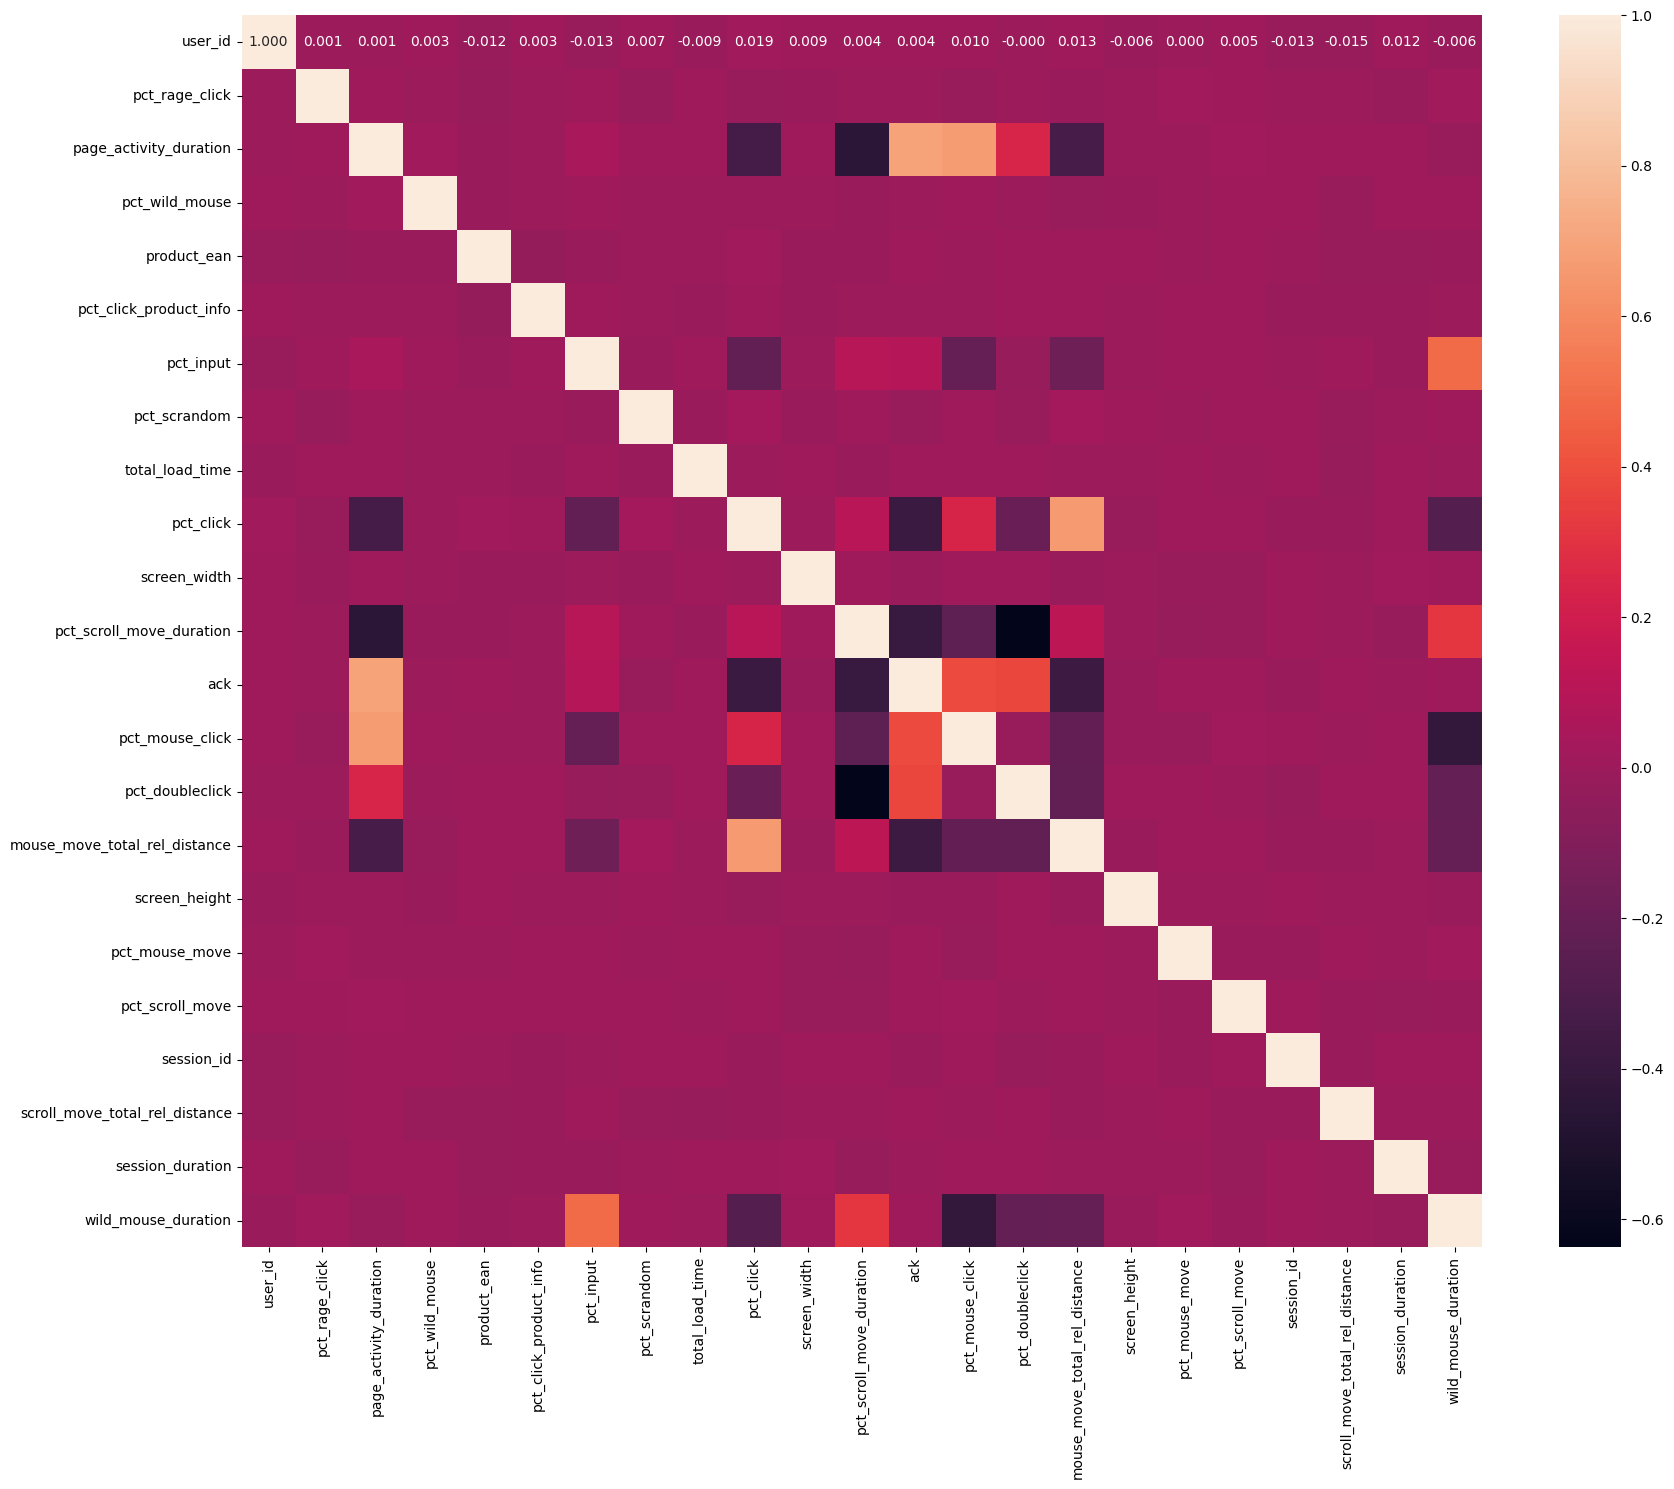

In [607]:
figure, ax = plt.subplots(figsize=(20,16))
sns.heatmap(session.corr(),ax=ax, annot =True, fmt = ".3f")

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1

KeyError: ''

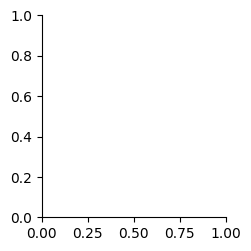

In [ ]:
sns.pairplot(session, vars=[''])

c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Daniel Lendvorský\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1

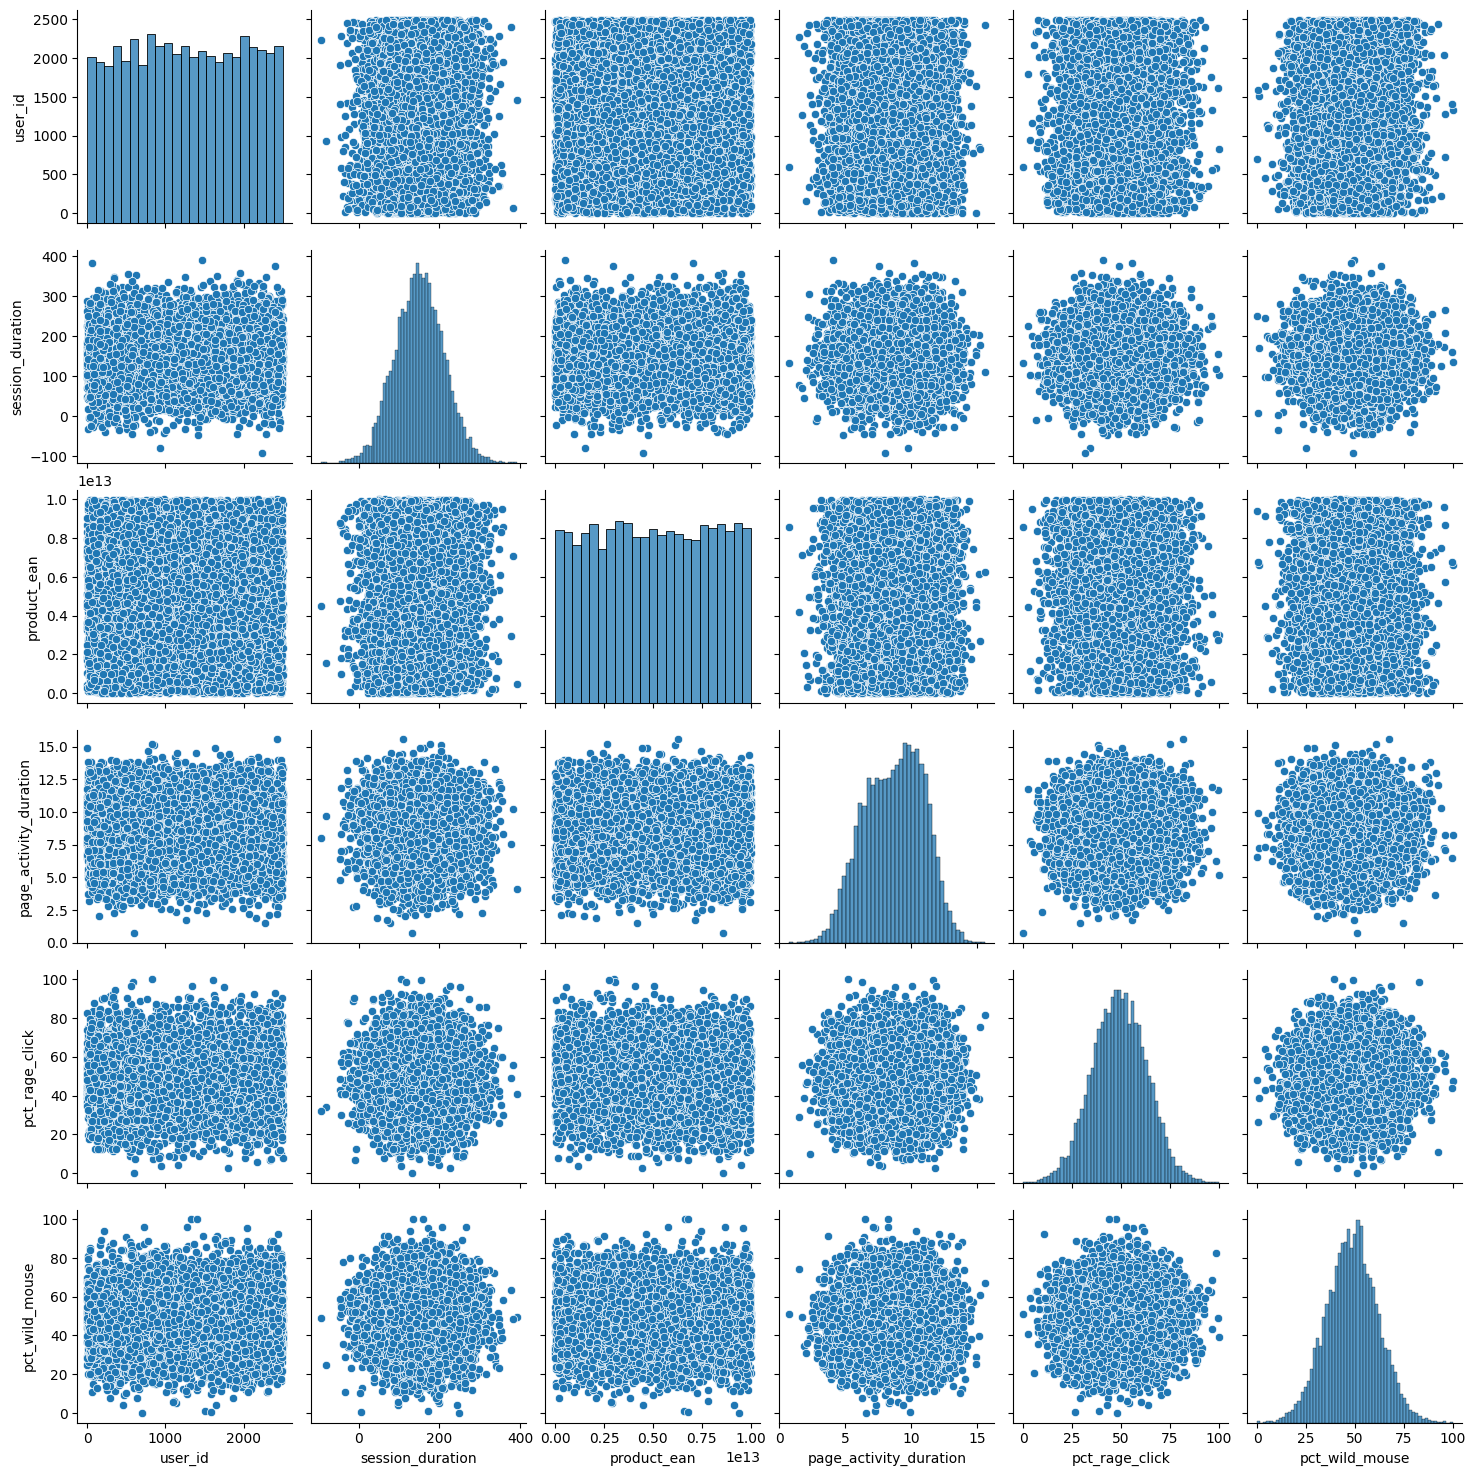

In [ ]:
sns.pairplot(session.dropna()[['user_id', 
                          'session_start', 
                          'session_duration', 
                          'product_ean', 
                          'browser_name', 
                          'page_activity_duration', 
                          'pct_rage_click',
                          'pct_wild_mouse',
                          








                          ]])

C:\Users\Daniel Lendvorský\AppData\Local\Temp\ipykernel_2804\2222207023.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  session.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'session_id'}>,
        <Axes: title={'center': 'scroll_move_total_re

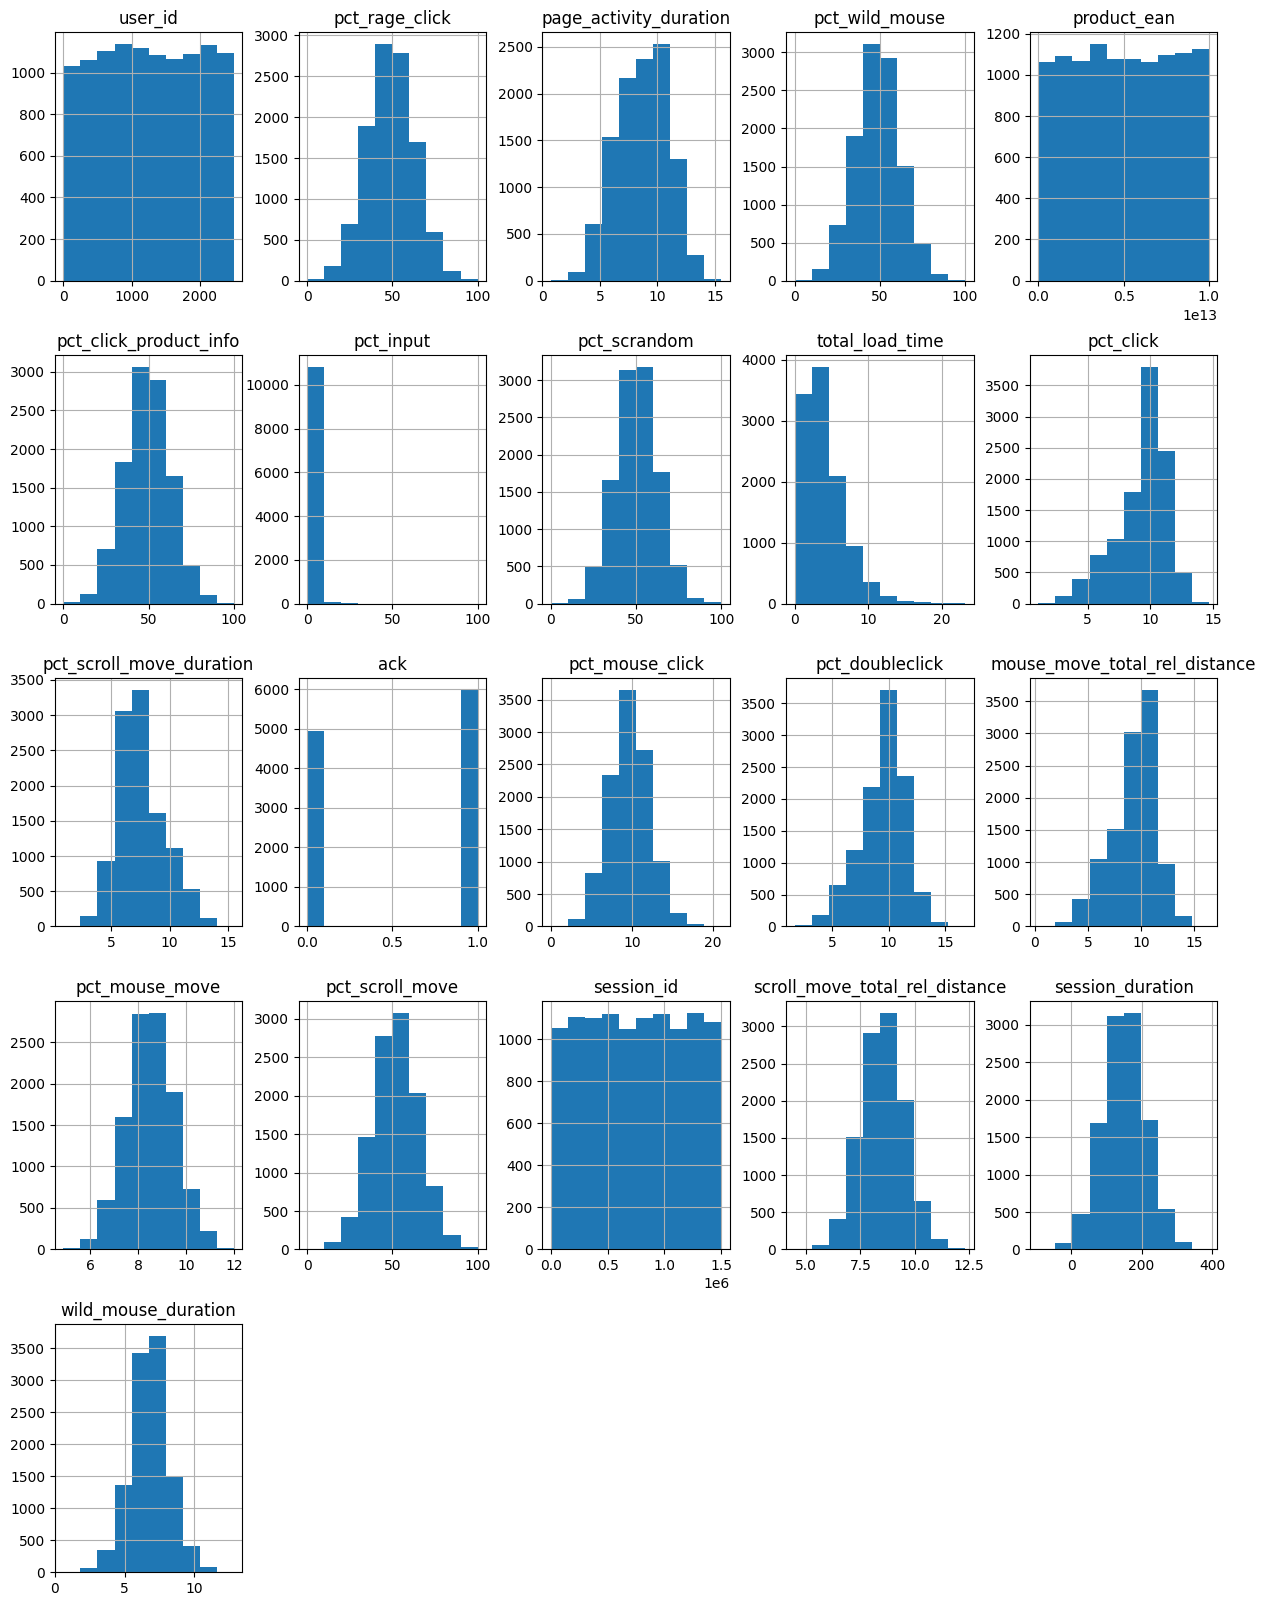

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
session.hist(ax = ax)

Formulácia a štatistické overenie hypotéz o dátach